start...
f:         3         2
0.4345 x - 5.607 x + 16.78 x - 10.61


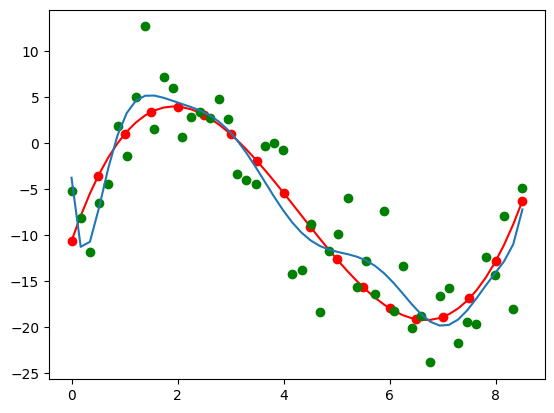

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,9,0.5);
    y=0.4345*np.power(x,3)-5.607*np.power(x,2)+16.78*x-10.61
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=4.0
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f

def my_MLE_fitting(x,y,M):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)#矩阵相乘
    imxx=linalg.inv(mxx)#direct inverse calculation
    #tmp=np.dot(imxx,mx.T)
    tmp=linalg.pinv(mx)#direct pseudo inverse calculation
    w=np.dot(tmp,vy)
    return w

def my_MLE_plot(x,w):
    M=len(w)-1
    N=len(x)
    
    mx=np.zeros([N,M+1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            mx[n][m]=np.power(x[n],m)
            
    y=np.dot(mx,w)
    return x,y

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#estimate the curve from the noisy data
w=my_MLE_fitting(x_noise,y_noise,M=10)
[x_est,y_est]=my_MLE_plot(x_curve,w)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()
    